# Instructor Do: Connecting Neurons

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

## Creating Dummy Data

In [2]:
# Creating dummy non-linear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

In [3]:
# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)


In [4]:
# Creating a DataFrame to plot the non-linear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons
df_moons.head()
 

,Feature 1,Feature 2,Target
0,0.676217,0.815220,0
1,1.487143,-0.210519,1
2,-1.027709,0.354966,0
3,0.236012,1.025531,0
4,1.856695,-0.042783,1


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

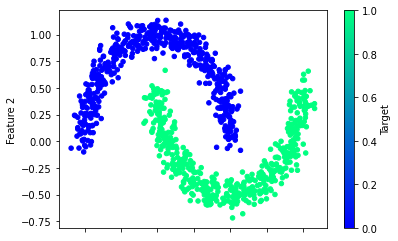

In [5]:
# Plotting the non-linear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


## Data Preprocessing

In [6]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=1
)

In [9]:
# Create the scaler instance
X_moon_scaler = StandardScaler()


In [10]:
# Fit the scaler
X_moon_scaler.fit(X_moon_train)


StandardScaler()

In [11]:
# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


## Neural Network Model Creation

![Simple neural network](../Images/simple-nn.png)

In [12]:
# Create the sequential model
nn_moon = Sequential()


Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-09-07 19:41:12.992273: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-07 19:41:12.992452: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
# First layer
number_inputs = 2
number_hidden_nodes = 6

nn_moon.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))


### Output Layer

![Output layer](../Images/simple-nn-layer-2.png)

In [14]:
# Output layer
number_classes = 1
nn_moon.add(Dense(units=number_classes, activation="sigmoid"))


In [15]:
# Model summary
nn_moon.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

In [16]:
# Compile model
nn_moon.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


## Fit the Model

In [17]:
# Training the model with the non-linear data
fit_model = nn_moon.fit(X_moon_train_scaled, y_moon_train, epochs=100)


Epoch 1/100


2022-09-07 19:42:50.209921: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-07 19:42:50.488512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 1s 8ms/step - loss: 0.8247 - accuracy: 0.5147
Epoch 2/100
24/24 [==============================] - 0s 6ms/step - loss: 0.7633 - accuracy: 0.5867
Epoch 3/100
24/24 [==============================] - 0s 6ms/step - loss: 0.7091 - accuracy: 0.6413
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6590 - accuracy: 0.6840
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6145 - accuracy: 0.6933
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5752 - accuracy: 0.7427
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5402 - accuracy: 0.7760
Epoch 8/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5092 - accuracy: 0.8133
Epoch 9/100
24/24 [==============================] - 0s 6ms/step - loss: 0.4814 - accuracy: 0.8613
Epoch 10/100
24/24 [==============================] - 0s 6ms/step - loss: 0.4573 - accuracy: 0.8600
Epoch 11/100
24/24 [=

## Model Evaluation

In [ ]:
# Evaluate the model using non-linear testing data
model_loss, model_accuracy = nn_moon.evaluate(X_moon_test_scaled, y_moon_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
